# PRCL-0017 - NO CHURN Telecom
### Business Case:
- No-Churn Telecom is an established Telecom operator in Europe with more than a decade in Business. Due to new players in the market, telecom industry has become very competitive and retaining customers becoming a challenge.
- In spite of No-Churn initiatives of reducing tariffs and promoting more offers, the churn rate ( percentage of customers migrating to competitors) is well above 10%.
- No-Churn wants to explore possibility of Machine Learning to help with following use cases to retain competitive edge in the industry.
### PROJECT GOAL
- Help No-Churn with their use cases with ML
    1. Understanding the variables that are influencing the customers to migrate.
    2. Creating Churn risk scores that can be indicative to drive retention campaigns.
    3. Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn YES customers.


### Installing relevant packages and importing libraries


In [1]:
!pip install pymysql
!pip install --upgrade pip
!pip install mysql_connector

In [2]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Checking the database and table names - Loading data

In [3]:
connection=mysql.connector.connect(host='18.136.157.135',user='dm_team3',password='DM!$!Team!27@9!20&')
cursor=connection.cursor()
cursor.execute('show databases')

In [4]:
for i in cursor:
    print(i)

('information_schema',)
('project_telecom',)


In [5]:
connection=mysql.connector.connect(host='18.136.157.135',user='dm_team3',password='DM!$!Team!27@9!20&',database='project_telecom')

In [6]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_telecom
0        telecom_churn_data


/Users/subbalakshmivedam/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
query = 'Select * from telecom_churn_data'
data = pd.read_sql(query,connection)
data

/Users/subbalakshmivedam/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


### Setting up the column names as per the meta data provided

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.columns

Index(['columns1', 'columns2', 'columns3', 'columns4', 'columns5', 'columns6',
       'columns7', 'columns8', 'columns9', 'columns10', 'columns11',
       'columns12', 'columns13', 'columns14', 'columns15', 'columns16',
       'columns17', 'columns18', 'columns19', 'columns20', 'columns21'],
      dtype='object')

In [10]:
q = ['State','Account_Length','Area_Code','Phone','International_Plan','VMail_Plan','VMail_Message','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge','Night Mins','Night Calls','Night Charge','International Mins','International calls','International Charge','CustServ Calls','Churn']
data.columns = q

In [11]:
data

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


### Column descriptions
- State : State of residence of customer
- Account Length : Number of active days
- Area Code : Area code 
- Phone : Phone number
- International Plan : Whether customer has international plan or not
- VMail Plan : Whether customer has voice mail feature or not
- VMail Message : Average number of voice mail messages per month.
- Day Mins : daytime calls duration
- Day Calls : count of daytime calls
- Day Charge : Billing cost of daytime calls
- Eve Mins : evening calls duration
- Eve Calls : count of Evening calls
- Eve Charge : Billing cost for evening calls
- Night Mins : Night calls duration
- Night Calls : count of night calls
- Night Charge : Billing cost for night calls
- International Mins : International calls duration
- International calls : count of international calls
- International Charge : Billing cost for international calls
- CustServ Calls : No. of calls to customer service
- Churn : Whether the customer left the service or not

### Data Basic Checks

In [12]:
data.describe()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
count,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,...,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617
unique,51,218,3,4617,2,2,47,1901,123,1901,...,125,1621,1813,130,1012,168,21,168,10,2
top,WV,90,415,382-4657,no,no,0,154,102,26.18,...,105,14.25,194.3,105,9.66,9.8,3,2.65,1,False.
freq,149,63,2299,1,4171,3381,3381,10,108,10,...,111,15,10,115,19,81,925,81,1651,3961


In [13]:
data.info() #All the columns are of object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account_Length        4617 non-null   object
 2   Area_Code             4617 non-null   object
 3   Phone                 4617 non-null   object
 4   International_Plan    4617 non-null   object
 5   VMail_Plan            4617 non-null   object
 6   VMail_Message         4617 non-null   object
 7   Day Mins              4617 non-null   object
 8   Day Calls             4617 non-null   object
 9   Day Charge            4617 non-null   object
 10  Eve Mins              4617 non-null   object
 11  Eve Calls             4617 non-null   object
 12  Eve Charge            4617 non-null   object
 13  Night Mins            4617 non-null   object
 14  Night Calls           4617 non-null   object
 15  Night Charge          4617 non-null   

In [14]:
data.isnull().sum() #The data is clean with no null values

State                   0
Account_Length          0
Area_Code               0
Phone                   0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

In [15]:
#pd.set_option('display.max_rows',None) #Setting up to display all rows

In [16]:
pd.set_option('display.max_columns',None) #Setting up to display all columns

In [17]:
data

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


### Data Cleaning - changing data types to be able to do EDA

In [18]:
#Changing datatypes of some columns to be able to analyse the data better
col = ['Account_Length','VMail_Message','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge','Night Mins','Night Calls','Night Charge','International Mins','International calls','International Charge','CustServ Calls']
for i in col:
    data[i] = data[i].astype('float')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   float64
 2   Area_Code             4617 non-null   object 
 3   Phone                 4617 non-null   object 
 4   International_Plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   VMail_Message         4617 non-null   float64
 7   Day Mins              4617 non-null   float64
 8   Day Calls             4617 non-null   float64
 9   Day Charge            4617 non-null   float64
 10  Eve Mins              4617 non-null   float64
 11  Eve Calls             4617 non-null   float64
 12  Eve Charge            4617 non-null   float64
 13  Night Mins            4617 non-null   float64
 14  Night Calls           4617 non-null   float64
 15  Night Charge         

### EDA

In [20]:
#Creating a new column, customer calls per 100 days of active connection
data['Cus_call_per_activelength'] = data['CustServ Calls']*100/data['Account_Length']

In [21]:
#Creating a new column, total bill to see if it had any effect on churn rate
data['Total_bill'] = data['Day Charge']+data['Eve Charge']+data['Night Charge']+data['International Charge']

In [22]:
data.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn,Cus_call_per_activelength,Total_bill
0,KS,128.0,415,382-4657,no,yes,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False.,0.781250,75.56
1,OH,107.0,415,371-7191,no,yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False.,0.934579,59.24
2,NJ,137.0,415,358-1921,no,no,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False.,0.000000,62.29
3,OH,84.0,408,375-9999,yes,no,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False.,2.380952,66.80
4,OK,75.0,415,330-6626,yes,no,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False.,4.000000,52.09


In [23]:
#Separating categorical and continuous columns
cat_col = ['Area_Code','International_Plan','VMail_Plan','Churn']
cont_col = ['Account_Length','VMail_Message','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge','Night Mins','Night Calls','Night Charge','International Mins','International calls','International Charge','CustServ Calls','Cus_call_per_activelength','Total_bill']

In [24]:
#Code to quieten warnings
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='State', ylabel='count'>

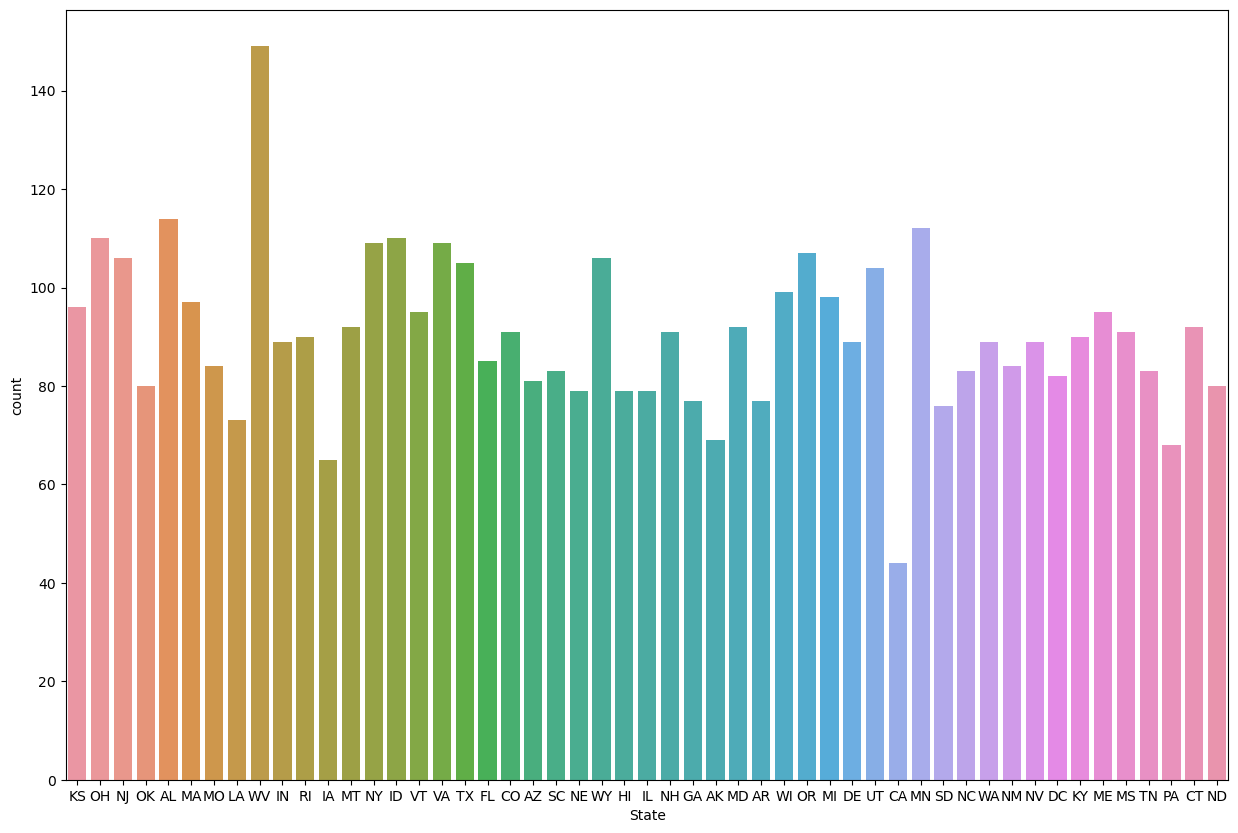

In [25]:
#Since state has more unique values, plotting it separately to analyse
plt.figure(figsize=(15,10))
sns.countplot(data.State)

<AxesSubplot:xlabel='State', ylabel='count'>

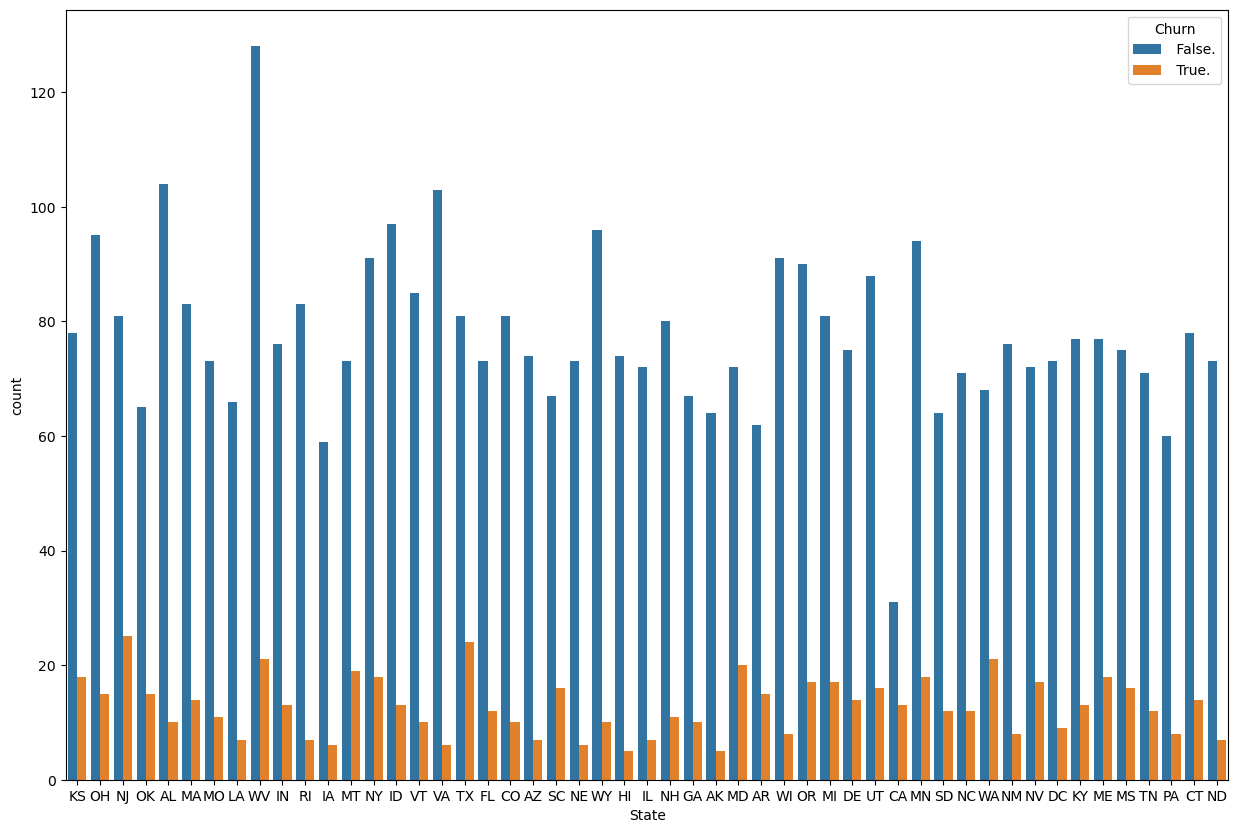

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(data.State,hue=data.Churn)

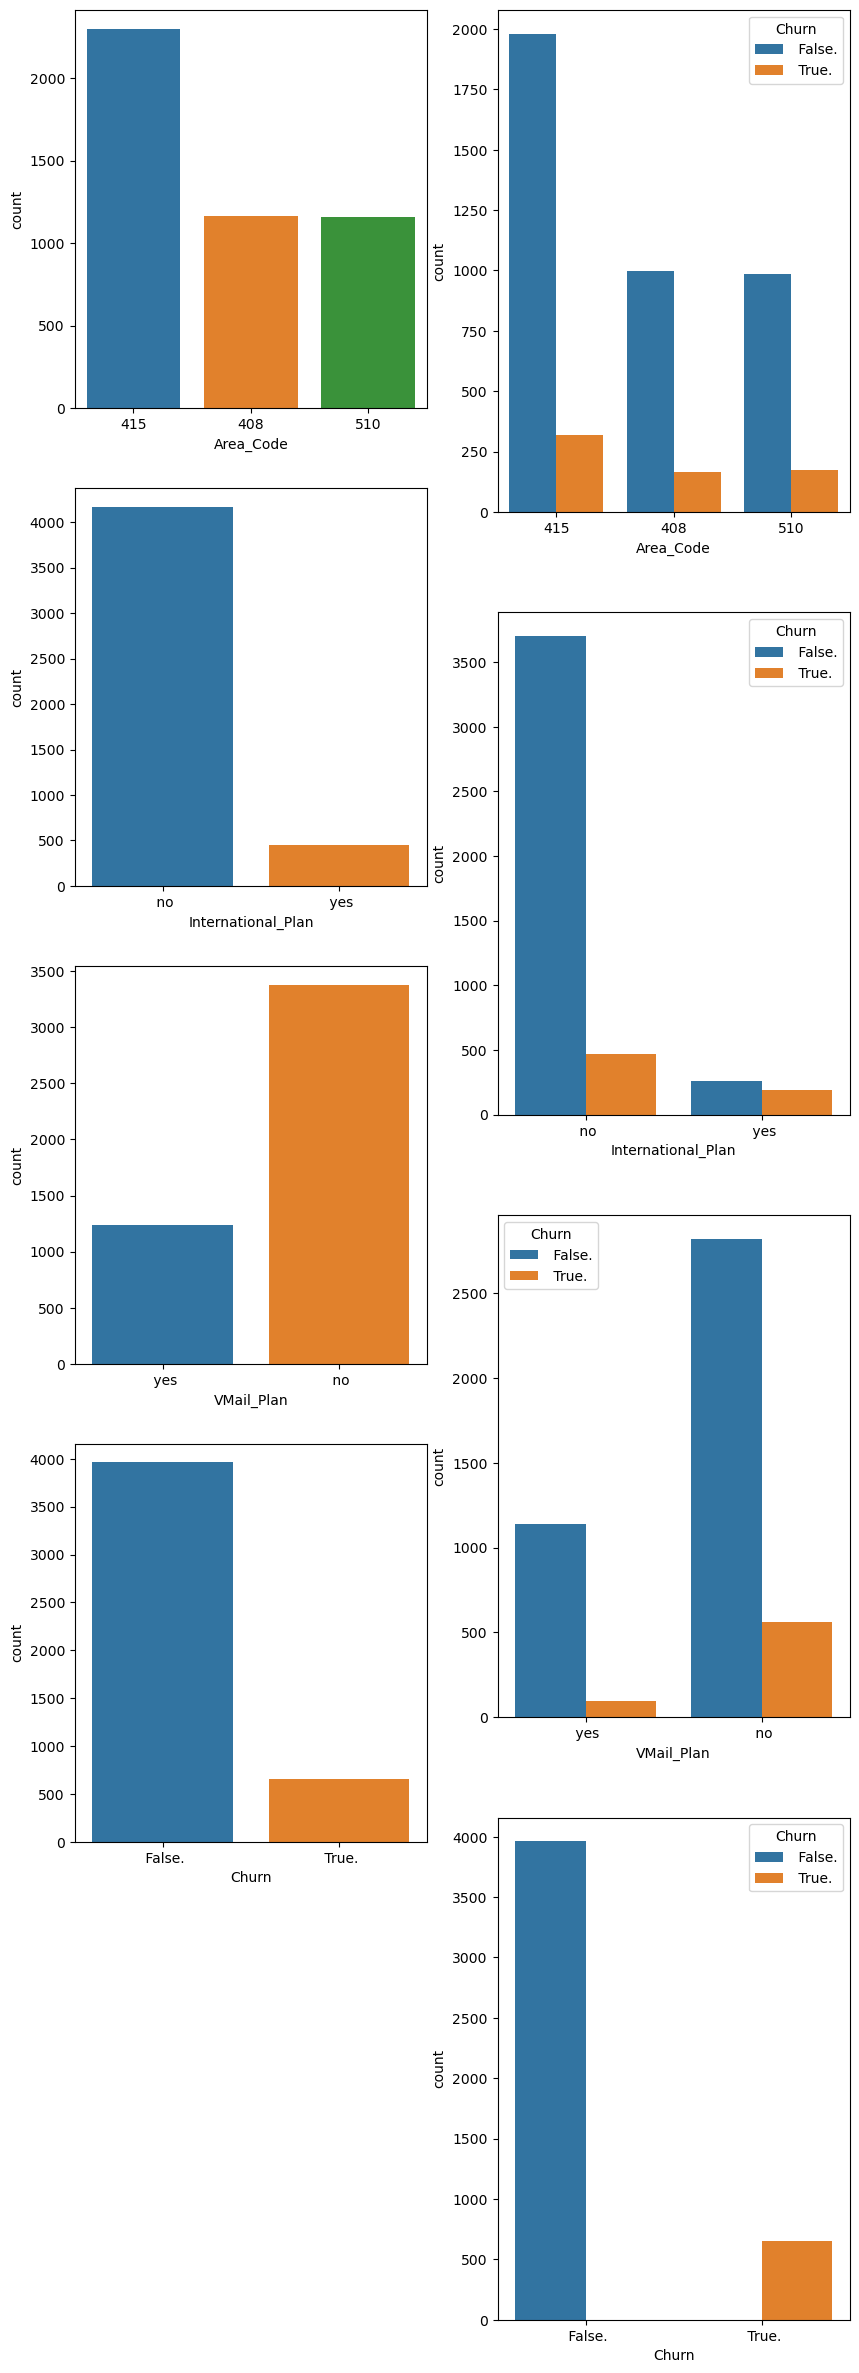

In [27]:
plt.figure(figsize=(10,30))
plt_num=1
for i in cat_col:
    plt.subplot(5,2,plt_num)
    sns.countplot(data[i])
    plt.xlabel(i)
    plt.subplot(4,2,plt_num+1)
    sns.countplot(data[i],hue=data.Churn)
    plt_num+=2
    

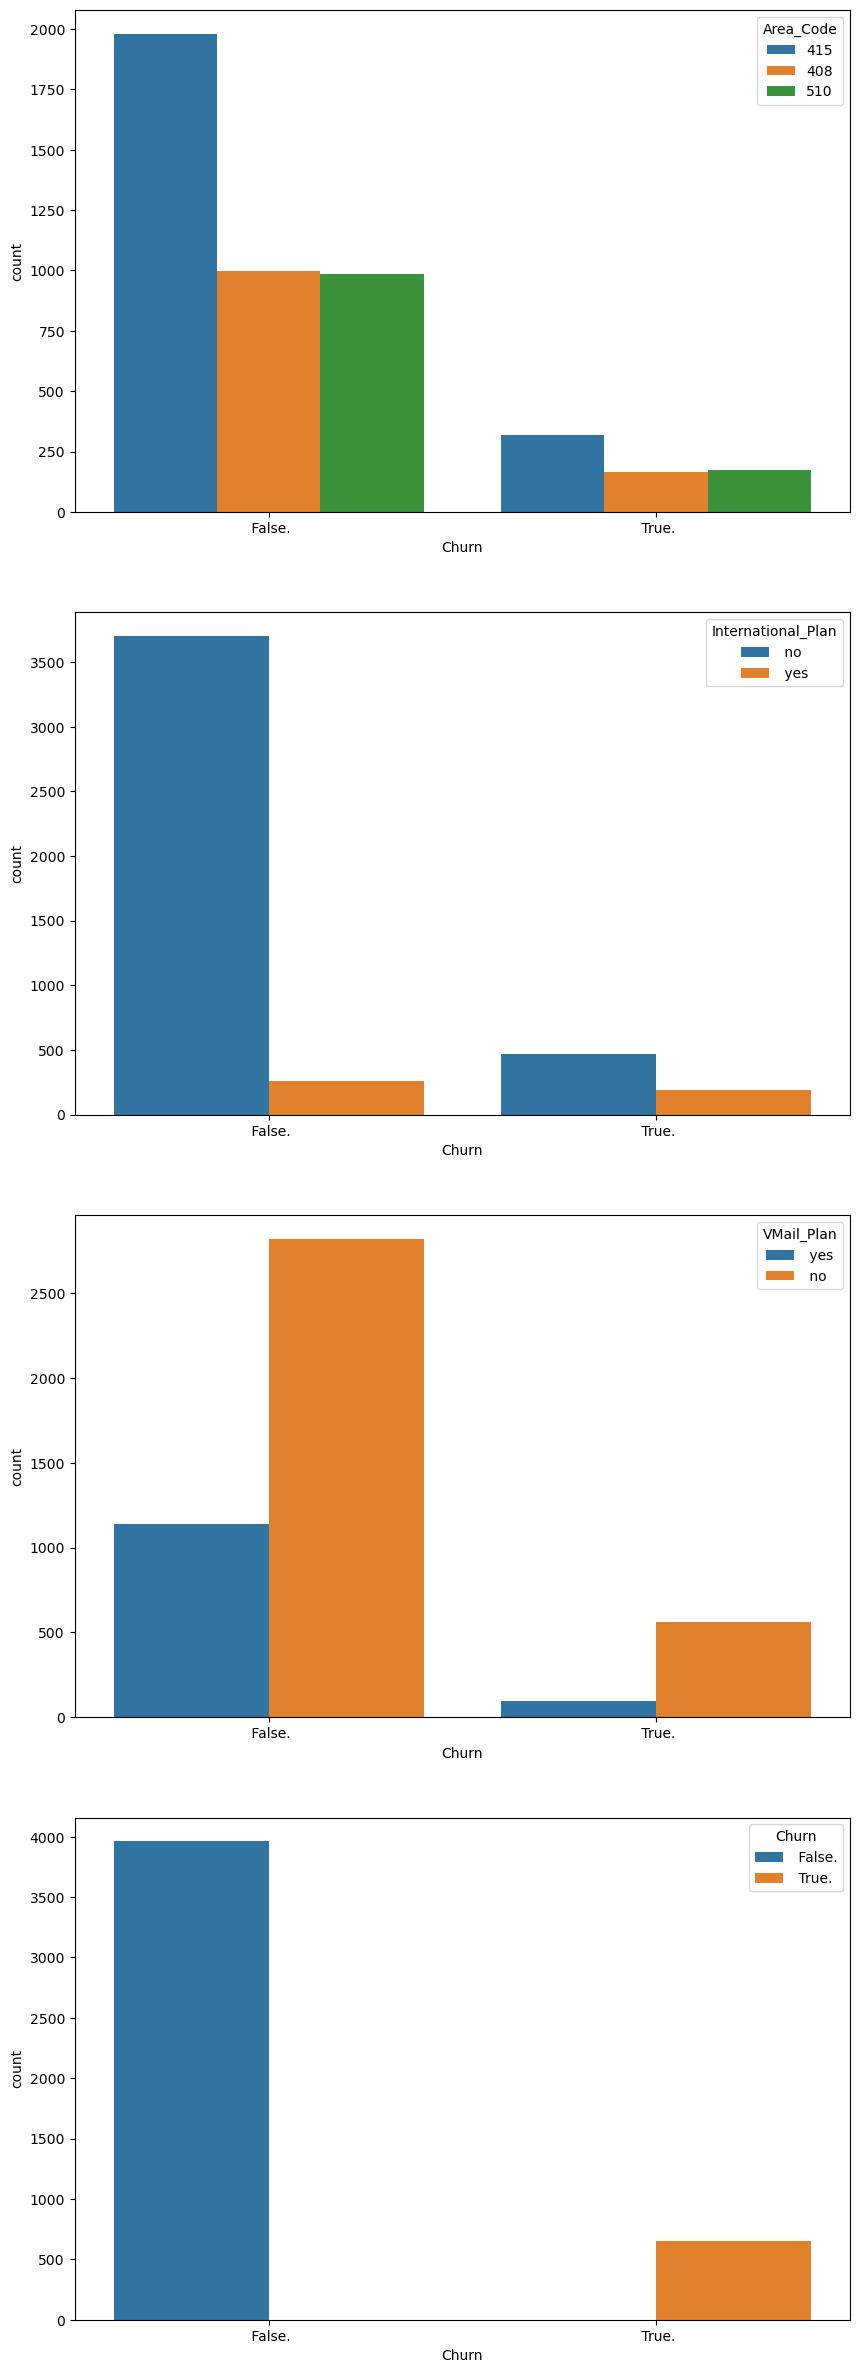

In [28]:
plt.figure(figsize=(10,30))
plt_num=1
for i in cat_col:
    plt.subplot(4,1,plt_num)
    sns.countplot(data.Churn, hue = data[i])
    plt_num+=1
    

In [29]:
data.Churn.unique()

array([' False.', ' True.'], dtype=object)

In [30]:
data.Churn.value_counts()

 False.    3961
 True.      656
Name: Churn, dtype: int64

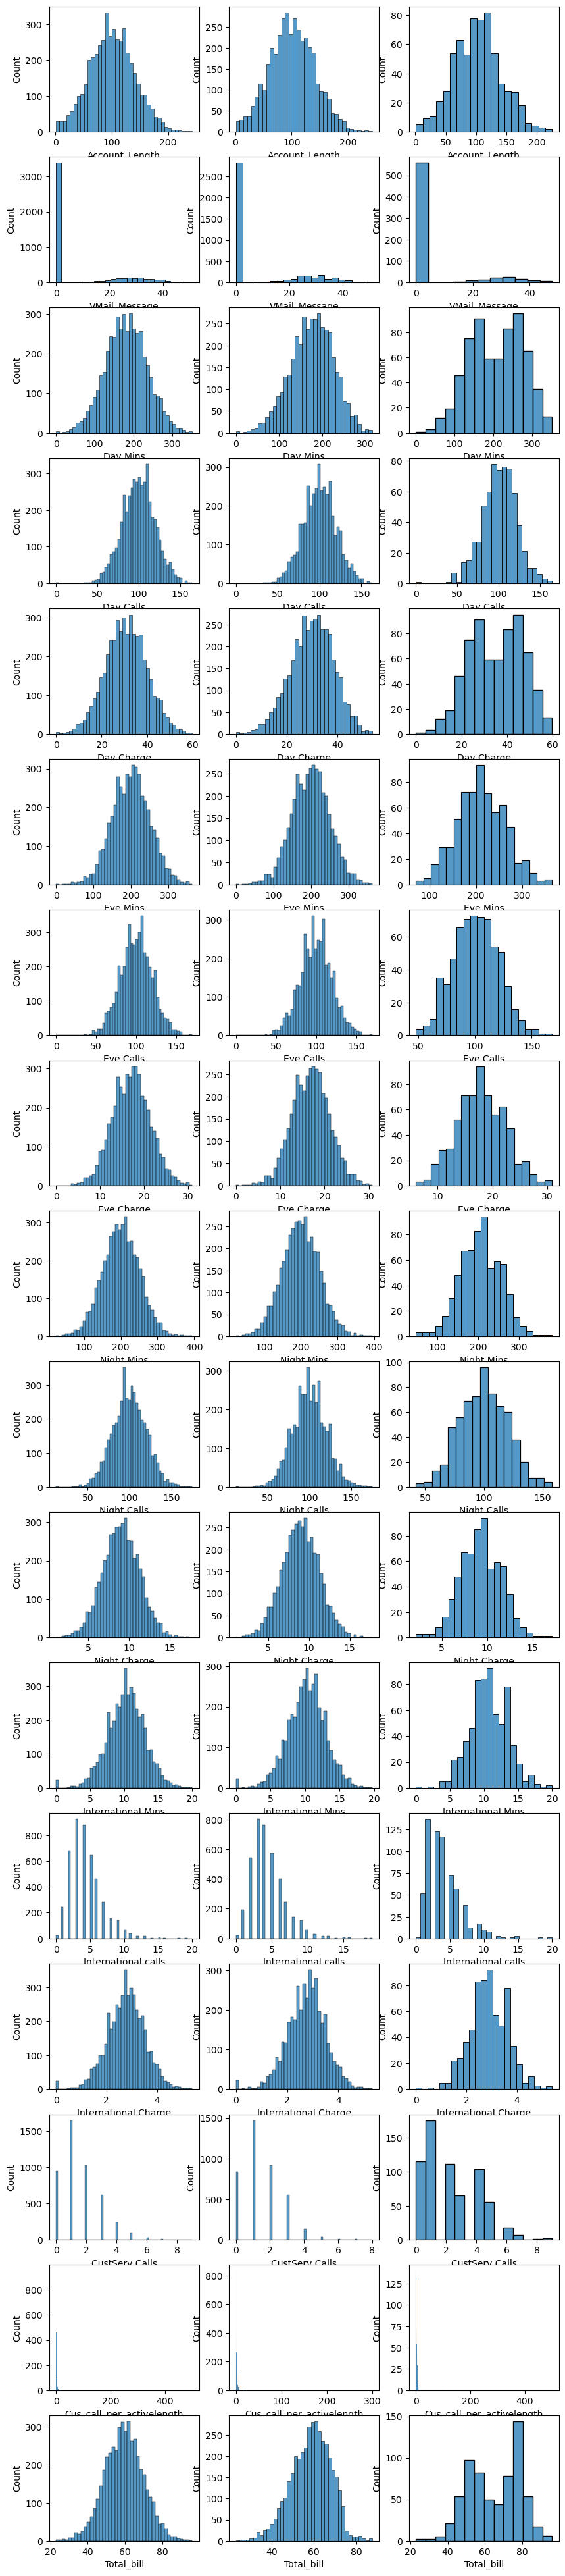

In [31]:
plt.figure(figsize=(10,50))
plt_num=1
for i in cont_col:
    plt.subplot(17,3,plt_num)
    sns.histplot(data[i])
    plt.subplot(17,3,plt_num+1)
    sns.histplot(data.loc[data.Churn == ' False.',i])
    plt.subplot(17,3,plt_num+2)
    sns.histplot(data.loc[data.Churn == ' True.',i])
    plt_num+=3
plt.show()

(0.0, 20.0)

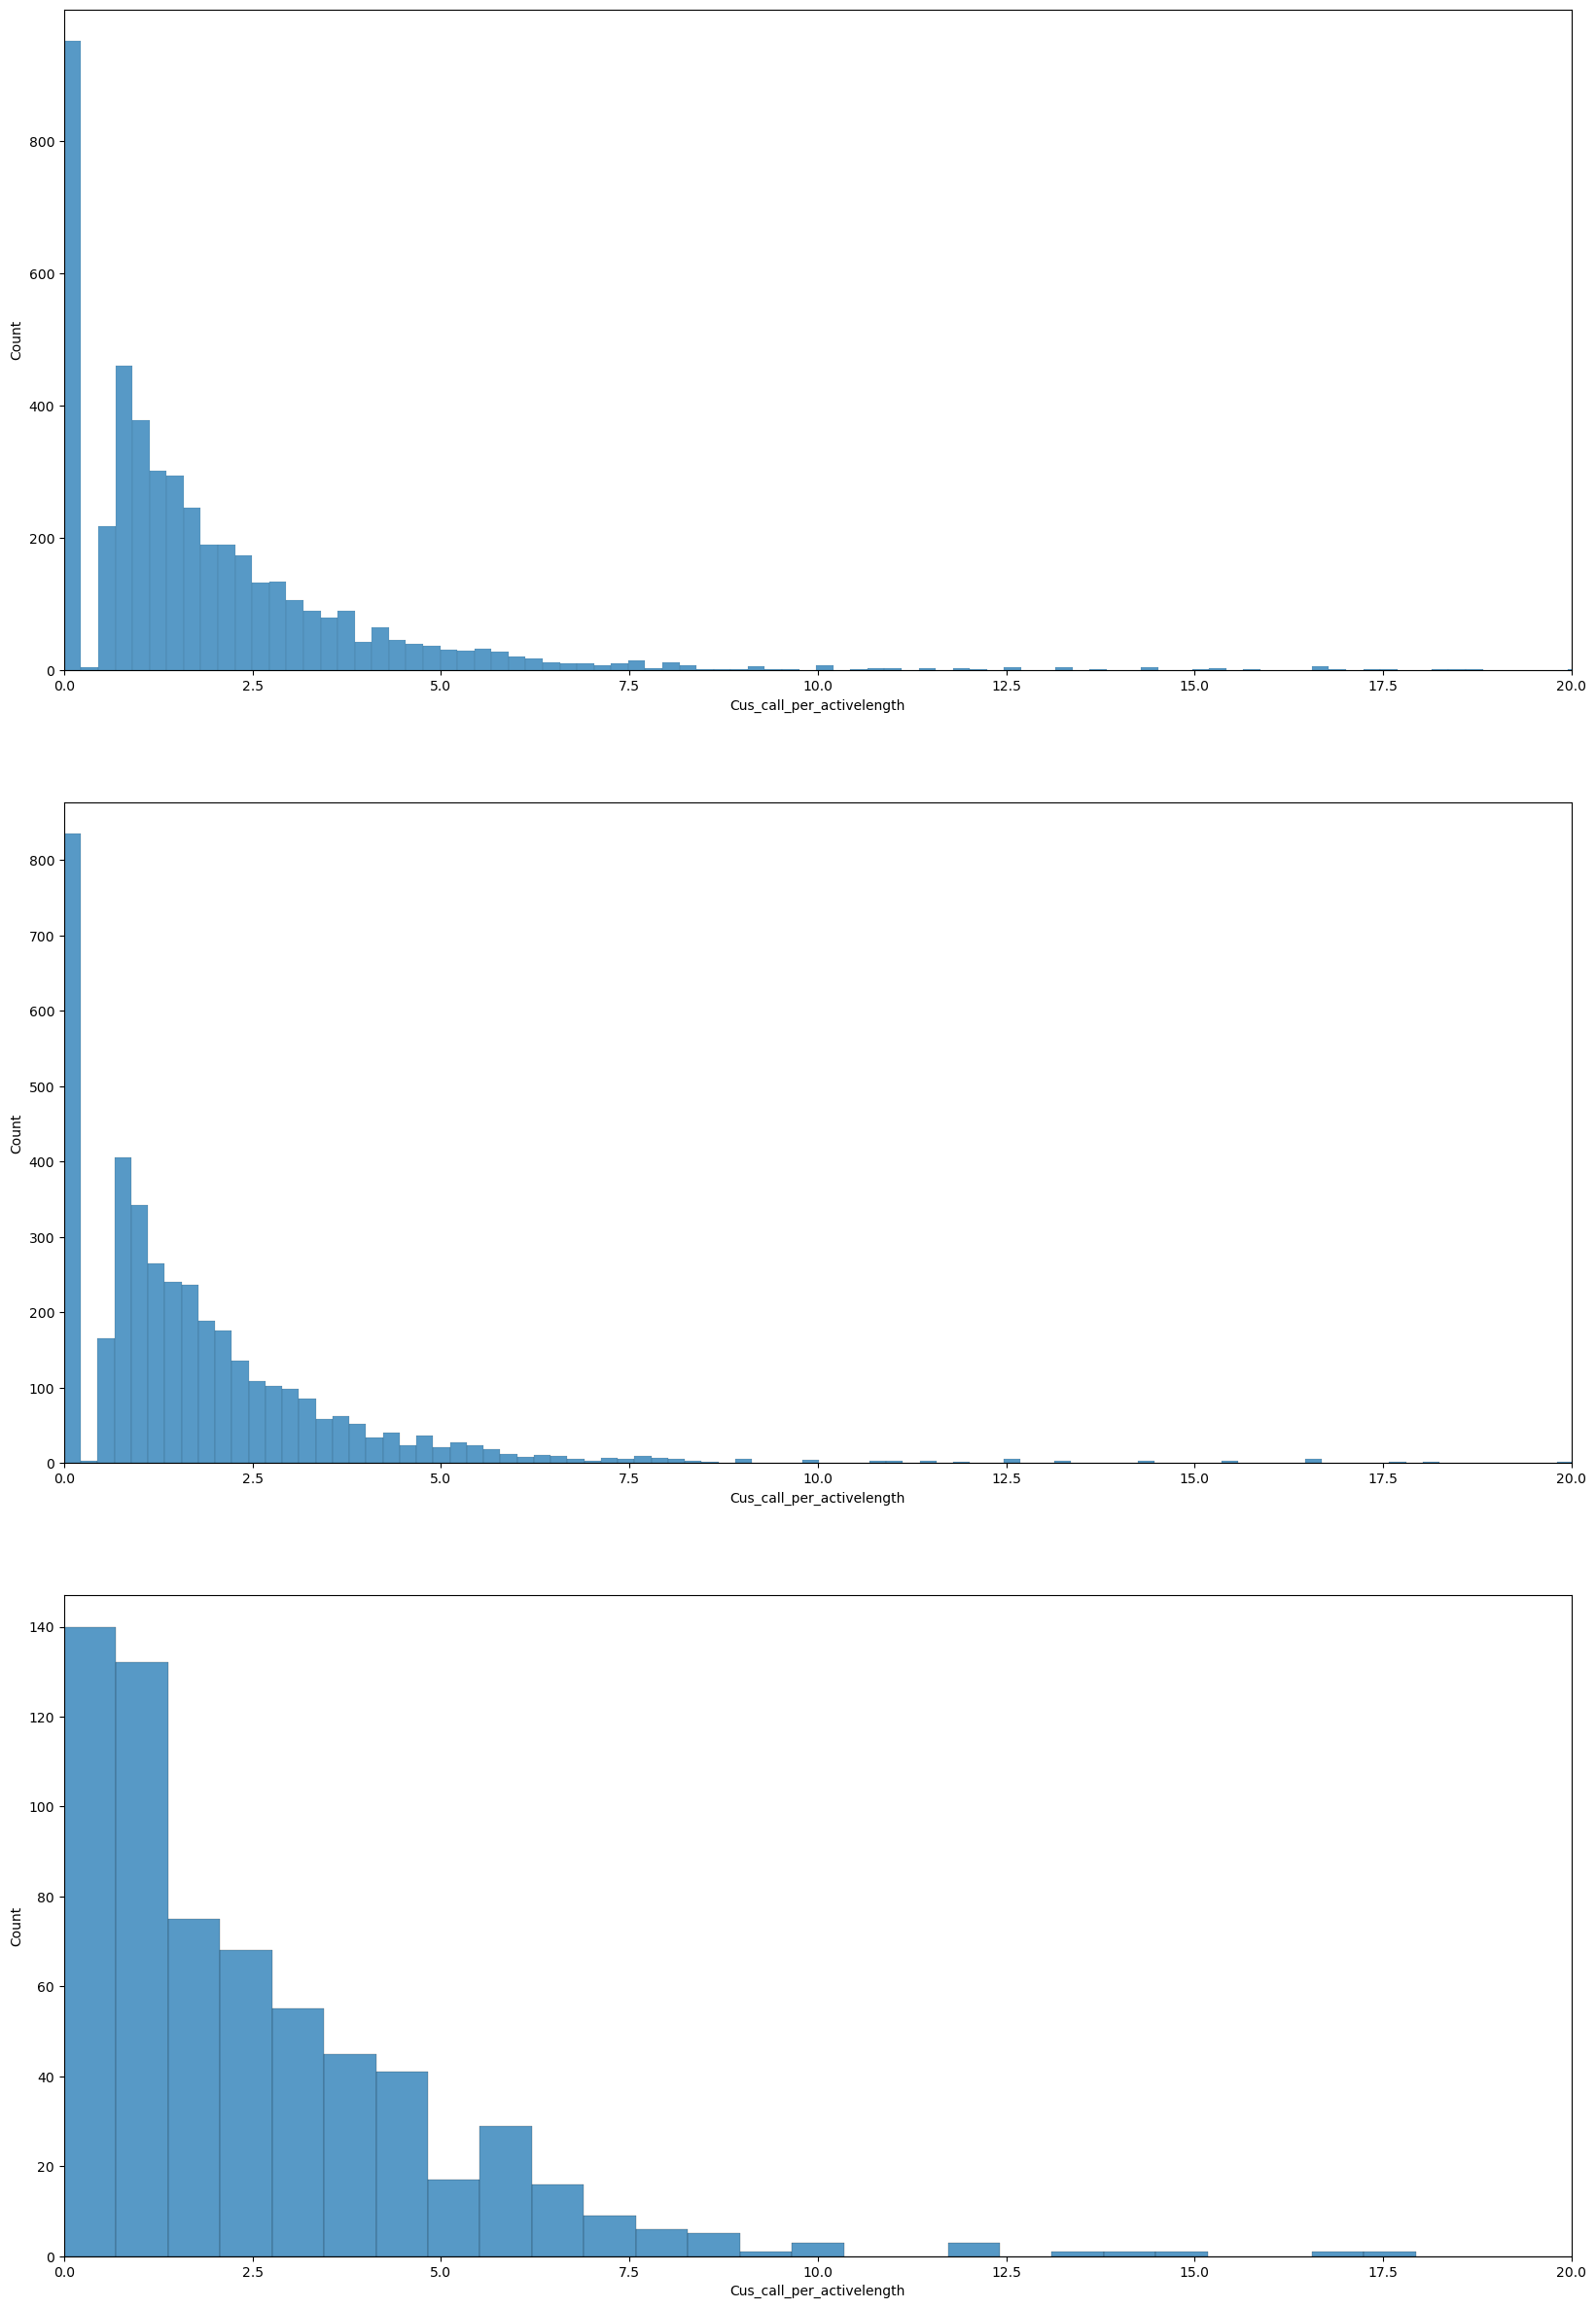

In [32]:
plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
sns.histplot(data['Cus_call_per_activelength'])
plt.xlim(xmin=0, xmax = 20)
plt.subplot(3,1,2)
sns.histplot(data.loc[data.Churn == ' False.','Cus_call_per_activelength'])
plt.xlim(xmin=0, xmax = 20)
plt.subplot(3,1,3)
sns.histplot(data.loc[data.Churn == ' True.','Cus_call_per_activelength'])
plt.xlim(xmin=0, xmax = 20)

### Insights from Data:
- The table contains data of 4617 customers/phone numbers belonging to 51 different states (of US mostly), divided/belonging to 3 area codes (415,408,510). About 50% of data, however belongs to area code 415, and relative proportion of churn vs retained customers is also less here. 
- The churn rate is over 10% as a whole.
- The data of since how long the account had been there, whether the customer had international plans, voice message plans (with average voice message count) and customer care calls, along with duration, count and charges of daytime, evening, nighttime and international calls are all presented
- Of the customers, most belonged to West Virgina(around 145), least belonged to California(around 40). Rest all customers are uniformly distributed across the states.
- Though the churn proportion is also uniform in most of states, most customers churned from Texas, New Jersey and Washington. However, if we compare proportion, higher rate of churn can be seen in california and washington as compared to those retained.
- 90% of customers, didn't have an international plan. However, churn(or migration) rate is higher in those who have international plan.
- About 70% of customers didn't have voice mail plan, and churn rate is high in those that didn't have the voice mail plan. Seeing higher rate of retention in customers with Voice Mail plan, seemingly 'No churn' has good competitive voice mail plan, that makes those customers retain.
- Most numbers of data are active for about 80-130 days, Most of those churned (or migrated) are active for more than 100 days. So seemingly, after 100 days, migration is being considered.
- The average number of voice mails by the subscribers is around 30. However, in case of churned customers, its slightly larger than 30, and for those who retained, its less than 30.
- The average day call duration remained 150-200 for all subscribers, while for those who reatined, it was 150-250 minutes. For those who churned, the call duration was more above 200. So, seeminly those with high day call durations, chose to migrate. The average count of calls remained 100 for all. So, those who churned, seemingly have higher day call durations. Regarding day call billing costs, for those who churned, the average billing cost was >40 USD, while for subscribers, the average billing is around 30 USD.
- The average evening call duration is >200 minutes, and averageevening call count is around 100 minutes, evening tariff on an average being 20 USD.
- The average night call duration is 200, while an average call count is 100, call charges is around 10USD
- The average international call duration is 10 minutes, while the average for those who churned is slightly more. The count of calls is similarly distributed for subscribers, with average around 4, for those who churned it is around 2-3. 
- The average customer service calls is around 1-2. However, for the churn customers, the average customer service calls seems to be larger than 2.
- The graph of customer care calls per cent of active connection days shows that, the customer service calls have been more for those who migrated. This could indicate that they either had been getting disturbed with customer care calls or that their issue resolution had been slow that they needed to reach customer care more number of times. 

## Data Preprocessing
1. Encoding categorical variables
2. Filtering features based on correlation
3. Scaling data

In [33]:
data.describe()

,Account_Length,VMail_Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Cus_call_per_activelength,Total_bill
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035,2.499443,59.517390
std,39.597194,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019,10.782465,10.366072
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,22.930000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000,0.675676,52.480000
50%,100.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000,1.360544,59.530000
75%,127.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000,2.564103,66.470000
max,243.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,500.000000,96.150000


#### The data descriptions and histograms above show no abnormalities in data.

#### Manual Encoding by using map function

In [34]:
data.International_Plan.unique()

array([' no', ' yes'], dtype=object)

In [35]:
data.VMail_Plan.unique()

array([' yes', ' no'], dtype=object)

In [36]:
data.Area_Code.unique()

array(['415', '408', '510'], dtype=object)

In [37]:
data.Churn.unique()

array([' False.', ' True.'], dtype=object)

In [38]:
#Manually encoding columns
data['International_Plan'] = data['International_Plan'].map({' yes':1,' no':0})
data['VMail_Plan'] = data['VMail_Plan'].map({' yes':1,' no':0})
data['Area_Code'] = data['Area_Code'].map({'415':1,'408':2,'510':3})
data['Churn'] = data['Churn'].map({' False.':0,' True.':1})

In [39]:
#Label encoding State Column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['State'] = le.fit_transform(data['State'])

In [40]:
#Let us check correlation with columns, now that we have encoded them
data.corr()

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn,Cus_call_per_activelength,Total_bill
State,1.000000,0.008638,0.009566,0.009789,-0.033323,-0.028491,0.009172,-0.008418,0.009173,0.002927,-0.010696,0.002920,0.014747,-0.002134,0.014735,-0.017423,0.012466,-0.017464,-0.016943,0.010979,0.013135,0.011310
Account_Length,0.008638,1.000000,-0.009384,0.013948,-0.004602,-0.012983,0.002002,0.032783,0.001999,-0.006778,0.015598,-0.006775,-0.002077,-0.009482,-0.002095,0.003483,0.023485,0.003501,0.002620,0.018046,-0.222211,-0.001247
Area_Code,0.009566,-0.009384,1.000000,0.033885,-0.011375,-0.010215,-0.031717,-0.024480,-0.031720,0.013104,-0.009605,0.013119,-0.007155,0.005887,-0.007173,-0.022480,-0.013562,-0.022513,0.023899,0.012915,0.011522,-0.025834
International_Plan,0.009789,0.013948,0.033885,1.000000,0.009278,0.011596,0.028220,0.007477,0.028223,0.023740,0.003360,0.023740,-0.025951,0.007390,-0.025959,0.036973,0.006717,0.036955,-0.012846,0.257524,-0.015513,0.031786
VMail_Plan,-0.033323,-0.004602,-0.011375,0.009278,1.000000,0.955280,0.004444,-0.005738,0.004441,0.021775,-0.005534,0.021779,0.006431,0.008468,0.006426,0.005872,-0.000043,0.005912,-0.014544,-0.110149,-0.003743,0.014795
VMail_Message,-0.028491,-0.012983,-0.010215,0.011596,0.955280,1.000000,0.009028,-0.003846,0.009025,0.017872,-0.006508,0.017878,0.004672,0.000889,0.004665,0.005167,0.007423,0.005202,-0.006951,-0.096884,-0.003841,0.016798
Day Mins,0.009172,0.002002,-0.031717,0.028220,0.004444,0.009028,1.000000,-0.002823,1.000000,-0.010260,0.012990,-0.010268,0.009604,0.005165,0.009591,-0.012314,0.000166,-0.012261,-0.008149,0.202439,-0.010945,0.882273
Day Calls,-0.008418,0.032783,-0.024480,0.007477,-0.005738,-0.003846,-0.002823,1.000000,-0.002821,-0.006430,0.003923,-0.006429,0.010730,-0.013299,0.010724,0.012951,0.010889,0.013055,-0.008747,0.016268,-0.005848,-0.001872
Day Charge,0.009173,0.001999,-0.031720,0.028223,0.004441,0.009025,1.000000,-0.002821,1.000000,-0.010255,0.012992,-0.010262,0.009606,0.005164,0.009593,-0.012315,0.000163,-0.012262,-0.008155,0.202434,-0.010939,0.882276
Eve Mins,0.002927,-0.006778,0.013104,0.023740,0.021775,0.017872,-0.010260,-0.006430,-0.010255,1.000000,0.001135,1.000000,-0.018830,0.014226,-0.018837,0.000165,0.005749,0.000172,-0.015598,0.087042,-0.010310,0.401358


<AxesSubplot:>

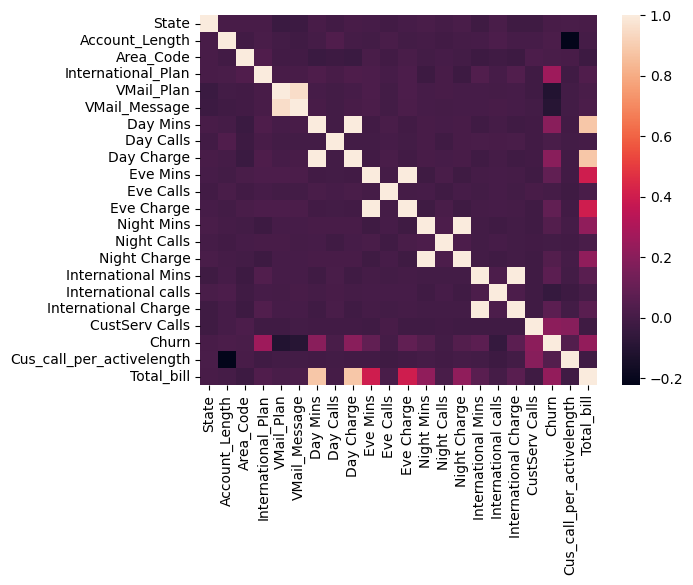

In [41]:
sns.heatmap(data.corr())

In [68]:
data.loc[(data.Churn==0) & (data.VMail_Plan==1)]

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn,Cus_call_per_activelength
0,16,128.0,1,382-4657,0,1,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,0,0.781250
1,35,107.0,1,371-7191,0,1,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0,0.934579
6,19,121.0,3,355-9993,0,1,24.0,218.2,88.0,37.09,348.5,108.0,29.62,212.6,118.0,9.57,7.5,7.0,2.03,3.0,0,2.479339
9,49,141.0,1,330-8173,1,1,37.0,258.6,84.0,43.96,222.0,111.0,18.87,326.4,97.0,14.69,11.2,5.0,3.02,0.0,0,0.000000
16,13,85.0,2,350-8884,0,1,27.0,196.4,139.0,33.39,280.9,90.0,23.88,89.3,75.0,4.02,13.8,4.0,3.73,1.0,0,1.176471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4608,3,89.0,3,346-1098,0,1,24.0,197.8,84.0,33.63,223.2,117.0,18.97,201.7,132.0,9.08,5.7,4.0,1.54,1.0,0,1.123596
4612,34,57.0,3,345-7512,0,1,25.0,144.0,81.0,24.48,187.2,112.0,15.91,158.6,122.0,7.14,8.5,6.0,2.30,3.0,0,5.263158
4613,32,177.0,2,343-6820,0,1,29.0,189.0,91.0,32.13,303.1,96.0,25.76,163.6,116.0,7.36,15.7,1.0,4.24,3.0,0,1.694915
4614,46,67.0,2,338-4794,0,1,33.0,127.5,126.0,21.68,296.1,129.0,25.17,200.9,91.0,9.04,13.0,3.0,3.51,1.0,0,1.492537


In [72]:
data.loc[(data.Churn==1) & (data.VMail_Plan==0)]

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn,Cus_call_per_activelength
10,15,65.0,1,329-6603,0,0,0.0,129.1,137.0,21.95,228.5,83.0,19.42,208.8,111.0,9.40,12.7,6.0,3.43,4.0,1,6.153846
15,34,161.0,1,351-7269,0,0,0.0,332.9,67.0,56.59,317.8,97.0,27.01,160.6,128.0,7.23,5.4,9.0,1.46,4.0,1,2.484472
21,5,77.0,2,393-7984,0,0,0.0,62.4,89.0,10.61,169.9,121.0,14.44,209.6,64.0,9.43,5.7,6.0,1.54,5.0,1,6.493506
33,3,12.0,2,360-1596,0,0,0.0,249.6,118.0,42.43,252.4,119.0,21.45,280.2,90.0,12.61,11.8,3.0,3.19,1.0,1,8.333333
48,13,119.0,1,398-1294,0,0,0.0,159.1,114.0,27.05,231.3,117.0,19.66,143.2,91.0,6.44,8.8,3.0,2.38,5.0,1,4.201681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4572,20,80.0,3,387-2084,1,0,0.0,275.4,89.0,46.82,186.7,66.0,15.87,201.3,87.0,9.06,9.4,2.0,2.54,0.0,1,0.000000
4576,49,131.0,3,350-7785,0,0,0.0,256.6,96.0,43.62,225.2,113.0,19.14,190.2,91.0,8.56,11.1,3.0,3.00,1.0,1,0.763359
4577,16,158.0,1,347-1864,1,0,0.0,200.0,98.0,34.00,205.4,106.0,17.46,323.7,96.0,14.57,8.9,2.0,2.40,0.0,1,0.000000
4597,37,65.0,2,393-8963,1,0,0.0,54.8,74.0,9.32,239.8,93.0,20.38,214.4,91.0,9.65,13.4,5.0,3.62,1.0,1,1.538462


#### Of the 656 churned customers, 97 (15%) subscribed to VMail Plan and 559 (85%) haven't. Of the 3961 retained customers, 2822 (70%) havent suscribed and 1139 (30%) subscribed. 
#### Another way of expressing is that, of those who subscribed to VMail plan (1236), 97(8%)  churned and 1139 (92%)retained. Among who didn't subscribe to VMail Plan (3381), 2822 (83.5%) retained, and  559 (16.5%) churned. 
#### So those who subscribed for VMail_Plan have mostly retained.
#### The columns Vmail_Plan and VMail_Message are also highly correlated. It makes sense as those who need VMail Plan will only subscribe it and those who haven't wouldn't use it. Hence we'll drop the VMail Message count column and retain Vmail Plan column
#### The heat map shows highest correlation between duration and charges of day, evening, night and international. We'll hence consider the billing charges and drop duration columns.
#### Total bill column was created to understand if the total bill is any reason for churn. However as observed from correlation, the total bill is significantly affected (since contributed) by day time call duration and charges. In this regard, we'd drop the total bill column, as it didn't effectively yeild the kind of correlation as expected. 

In [42]:
data1 = data.drop(['Phone','VMail_Message','Day Mins','Eve Mins','Night Mins','International Mins','Churn','Total_bill'],axis=1)
y = data.Churn

In [43]:
data1

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,International calls,International Charge,CustServ Calls,Cus_call_per_activelength
0,16,128.0,1,0,1,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,1.0,0.781250
1,35,107.0,1,0,1,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,1.0,0.934579
2,31,137.0,1,0,0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0.0,0.000000
3,35,84.0,2,1,0,71.0,50.90,88.0,5.26,89.0,8.86,7.0,1.78,2.0,2.380952
4,36,75.0,1,1,0,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,3.0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,34,57.0,3,0,1,81.0,24.48,112.0,15.91,122.0,7.14,6.0,2.30,3.0,5.263158
4613,32,177.0,2,0,1,91.0,32.13,96.0,25.76,116.0,7.36,1.0,4.24,3.0,1.694915
4614,46,67.0,2,0,1,126.0,21.68,129.0,25.17,91.0,9.04,3.0,3.51,1.0,1.492537
4615,22,98.0,1,0,1,98.0,28.71,117.0,19.24,96.0,7.45,3.0,3.86,0.0,0.000000


#### Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
data_scaled = mms.fit_transform(data1)
x = pd.DataFrame(data_scaled, columns = data1.columns)

In [45]:
x

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,International calls,International Charge,CustServ Calls,Cus_call_per_activelength
0,0.32,0.524793,0.0,0.0,1.0,0.666667,0.754183,0.582353,0.542866,0.484663,0.595935,0.15,0.500000,0.111111,0.001563
1,0.70,0.438017,0.0,0.0,1.0,0.745455,0.459672,0.605882,0.537690,0.558282,0.622236,0.15,0.685185,0.111111,0.001869
2,0.62,0.561983,0.0,0.0,0.0,0.690909,0.692436,0.647059,0.333225,0.564417,0.375374,0.25,0.609259,0.000000,0.000000
3,0.70,0.342975,0.5,1.0,0.0,0.430303,0.851740,0.517647,0.170171,0.472393,0.467424,0.35,0.329630,0.222222,0.004762
4,0.72,0.305785,0.0,1.0,0.0,0.684848,0.474230,0.717647,0.407959,0.668712,0.440526,0.15,0.505556,0.333333,0.008000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,0.68,0.231405,1.0,0.0,1.0,0.490909,0.409639,0.658824,0.514720,0.674847,0.364614,0.30,0.425926,0.333333,0.010526
4613,0.64,0.727273,0.5,0.0,1.0,0.551515,0.537651,0.564706,0.833387,0.638037,0.377764,0.05,0.785185,0.333333,0.003390
4614,0.92,0.272727,0.5,0.0,1.0,0.763636,0.362784,0.758824,0.814300,0.484663,0.478183,0.15,0.650000,0.111111,0.002985
4615,0.44,0.400826,0.0,0.0,1.0,0.593939,0.480422,0.688235,0.622452,0.515337,0.383144,0.15,0.714815,0.000000,0.000000


In [46]:
y.value_counts()

0    3961
1     656
Name: Churn, dtype: int64

### Modeling
- Data is clearly imbalanced. We'll first proceed with the data as it is. Since it is a binary classification problem, we'll employ Logistic Regression, Naive Bayes, KNN, SVM, Decision Tree, RF, Bagging with KNN/LogReg, Gradient Boosting, XGBoosting and see results.
- Next we proceed to balancing the data using imblearn SMOTE and sklearn minority resampling and compare results with all algorithms

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
y_train.value_counts()

0    2963
1     499
Name: Churn, dtype: int64

In [51]:
#Keeping smote ready
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_smote,y_smote = sm.fit_resample(x_train,y_train)
y_smote.value_counts()

0    2963
1    2963
Name: Churn, dtype: int64

In [52]:
#DF for storing results of each model
Results = pd.DataFrame(index=['Accuracy','Precision','Recall','F1'])

In [54]:
#Importing metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#### Logistic Regression

In [55]:
#Logistic Regression without balancing
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['LogReg w/o balancing'] = [acc,pr,re,f1]

Accuracy:  0.8606060606060606 
Precision:  0.4696969696969697 
Recall Score 0.19745222929936307 
F1 Score 0.27802690582959644 
Confusion Matrix
 [[963  35]
 [126  31]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       998
           1       0.47      0.20      0.28       157

    accuracy                           0.86      1155
   macro avg       0.68      0.58      0.60      1155
weighted avg       0.83      0.86      0.84      1155



In [56]:
#Logistic Regression with SMOTE balancing
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_smote,y_smote)
y_pred = LR.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['LogReg with smote'] = [acc,pr,re,f1]

Accuracy:  0.7393939393939394 
Precision:  0.3153846153846154 
Recall Score 0.7834394904458599 
F1 Score 0.44972577696526506 
Confusion Matrix
 [[731 267]
 [ 34 123]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       998
           1       0.32      0.78      0.45       157

    accuracy                           0.74      1155
   macro avg       0.64      0.76      0.64      1155
weighted avg       0.87      0.74      0.78      1155



#### KNN Classifier

In [57]:
#KNN without data balancing
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['KNN w/o balance'] = [acc,pr,re,f1]

Accuracy:  0.8805194805194805 
Precision:  0.6557377049180327 
Recall Score 0.25477707006369427 
F1 Score 0.36697247706422015 
Confusion Matrix
 [[977  21]
 [117  40]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       998
           1       0.66      0.25      0.37       157

    accuracy                           0.88      1155
   macro avg       0.77      0.62      0.65      1155
weighted avg       0.86      0.88      0.86      1155



In [58]:
#KNN with balanced data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_smote,y_smote)
y_pred = KNN.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['KNN with SMOTE'] = [acc,pr,re,f1]

Accuracy:  0.7766233766233767 
Precision:  0.34365325077399383 
Recall Score 0.7070063694267515 
F1 Score 0.46249999999999997 
Confusion Matrix
 [[786 212]
 [ 46 111]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       998
           1       0.34      0.71      0.46       157

    accuracy                           0.78      1155
   macro avg       0.64      0.75      0.66      1155
weighted avg       0.86      0.78      0.81      1155



#### Naive Bayes

In [59]:
#Naive Bayes with imbalanced data
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()  #Creating instance
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['NB w/o balance'] = [acc,pr,re,f1]

Accuracy:  0.8640692640692641 
Precision:  0.0 
Recall Score 0.0 
F1 Score 0.0 
Confusion Matrix
 [[998   0]
 [157   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       998
           1       0.00      0.00      0.00       157

    accuracy                           0.86      1155
   macro avg       0.43      0.50      0.46      1155
weighted avg       0.75      0.86      0.80      1155



In [60]:
#Naive Bayes with SMOTE
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()  #Creating instance
nb.fit(x_smote,y_smote)
y_pred = nb.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['NB with smote'] = [acc,pr,re,f1]

Accuracy:  0.8043290043290043 
Precision:  0.34934497816593885 
Recall Score 0.5095541401273885 
F1 Score 0.4145077720207253 
Confusion Matrix
 [[849 149]
 [ 77  80]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       998
           1       0.35      0.51      0.41       157

    accuracy                           0.80      1155
   macro avg       0.63      0.68      0.65      1155
weighted avg       0.84      0.80      0.82      1155



#### SVM Classifier

In [61]:
#SVM with imbalanced data
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['SVM w/o balance'] = [acc,pr,re,f1]

Accuracy:  0.8917748917748918 
Precision:  0.75 
Recall Score 0.3057324840764331 
F1 Score 0.4343891402714932 
Confusion Matrix
 [[982  16]
 [109  48]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       998
           1       0.75      0.31      0.43       157

    accuracy                           0.89      1155
   macro avg       0.83      0.64      0.69      1155
weighted avg       0.88      0.89      0.87      1155



In [62]:
#SVM with SMOTE data
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_smote,y_smote)
y_pred = svc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['SVM with SMOTE'] = [acc,pr,re,f1]

Accuracy:  0.8467532467532467 
Precision:  0.4635036496350365 
Recall Score 0.8089171974522293 
F1 Score 0.5893271461716938 
Confusion Matrix
 [[851 147]
 [ 30 127]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       998
           1       0.46      0.81      0.59       157

    accuracy                           0.85      1155
   macro avg       0.71      0.83      0.75      1155
weighted avg       0.90      0.85      0.86      1155



#### Decision Tree

In [63]:
#DT with imbalanced data
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['DT w/o balance'] = [acc,pr,re,f1]

Accuracy:  0.90995670995671 
Precision:  0.6432432432432432 
Recall Score 0.7579617834394905 
F1 Score 0.6959064327485379 
Confusion Matrix
 [[932  66]
 [ 38 119]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       998
           1       0.64      0.76      0.70       157

    accuracy                           0.91      1155
   macro avg       0.80      0.85      0.82      1155
weighted avg       0.92      0.91      0.91      1155



In [64]:
#DT with smote
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_smote,y_smote)
y_pred=dt.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['DT with smote'] = [acc,pr,re,f1]

Accuracy:  0.8943722943722944 
Precision:  0.583732057416268 
Recall Score 0.7770700636942676 
F1 Score 0.6666666666666669 
Confusion Matrix
 [[911  87]
 [ 35 122]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       998
           1       0.58      0.78      0.67       157

    accuracy                           0.89      1155
   macro avg       0.77      0.84      0.80      1155
weighted avg       0.91      0.89      0.90      1155



#### Random Forest Classifier

In [65]:
#RF with imbalanced data
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['RF w/o balance'] = [acc,pr,re,f1]

Accuracy:  0.9471861471861471 
Precision:  0.9615384615384616 
Recall Score 0.6369426751592356 
F1 Score 0.7662835249042146 
Confusion Matrix
 [[994   4]
 [ 57 100]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       998
           1       0.96      0.64      0.77       157

    accuracy                           0.95      1155
   macro avg       0.95      0.82      0.87      1155
weighted avg       0.95      0.95      0.94      1155



In [66]:
#RF with smote
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_smote,y_smote)
y_pred = rf_clf.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['RF with SMOTE'] = [acc,pr,re,f1]

Accuracy:  0.9367965367965368 
Precision:  0.7560975609756098 
Recall Score 0.7898089171974523 
F1 Score 0.7725856697819315 
Confusion Matrix
 [[958  40]
 [ 33 124]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       998
           1       0.76      0.79      0.77       157

    accuracy                           0.94      1155
   macro avg       0.86      0.87      0.87      1155
weighted avg       0.94      0.94      0.94      1155



#### Bagging with KNN

In [67]:
#Bagging with KNN and imbalanced data
from sklearn.ensemble import BaggingClassifier
model_bagg=BaggingClassifier(base_estimator=KNN,n_estimators=20)
model_bagg.fit(x_train,y_train)  
y_pred=model_bagg.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['KNN Bagging w/o balance'] = [acc,pr,re,f1]

Accuracy:  0.8761904761904762 
Precision:  0.6166666666666667 
Recall Score 0.2356687898089172 
F1 Score 0.34101382488479265 
Confusion Matrix
 [[975  23]
 [120  37]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       998
           1       0.62      0.24      0.34       157

    accuracy                           0.88      1155
   macro avg       0.75      0.61      0.64      1155
weighted avg       0.85      0.88      0.85      1155



In [68]:
#Bagging with KNN and SMOTE
from sklearn.ensemble import BaggingClassifier
model_bagg=BaggingClassifier(base_estimator=KNN,n_estimators=20)
model_bagg.fit(x_smote,y_smote)  
y_pred=model_bagg.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['KNN Bagging with SMOTE'] = [acc,pr,re,f1]

Accuracy:  0.7818181818181819 
Precision:  0.3510971786833856 
Recall Score 0.7133757961783439 
F1 Score 0.47058823529411764 
Confusion Matrix
 [[791 207]
 [ 45 112]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       998
           1       0.35      0.71      0.47       157

    accuracy                           0.78      1155
   macro avg       0.65      0.75      0.67      1155
weighted avg       0.87      0.78      0.81      1155



#### Gradient Boosting

In [69]:
#Gradient Boosting with imbalanced data
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm.fit(x_train,y_train) 
y_pred=gbm.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['GB w/o balance'] = [acc,pr,re,f1]

Accuracy:  0.9532467532467532 
Precision:  0.9186991869918699 
Recall Score 0.7197452229299363 
F1 Score 0.8071428571428572 
Confusion Matrix
 [[988  10]
 [ 44 113]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       998
           1       0.92      0.72      0.81       157

    accuracy                           0.95      1155
   macro avg       0.94      0.85      0.89      1155
weighted avg       0.95      0.95      0.95      1155



In [70]:
#Gradient Boosting with SMOTE
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm.fit(x_smote,y_smote) 
y_pred=gbm.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['GB with SMOTE'] = [acc,pr,re,f1]

Accuracy:  0.9134199134199135 
Precision:  0.6507936507936508 
Recall Score 0.7834394904458599 
F1 Score 0.7109826589595377 
Confusion Matrix
 [[932  66]
 [ 34 123]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       998
           1       0.65      0.78      0.71       157

    accuracy                           0.91      1155
   macro avg       0.81      0.86      0.83      1155
weighted avg       0.92      0.91      0.92      1155



#### XG Boosting

In [71]:
#XG Boosting without data balancing
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
y_pred = xgbc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['XGB w/o balancing'] = [acc,pr,re,f1]

Accuracy:  0.961038961038961 
Precision:  0.917910447761194 
Recall Score 0.7834394904458599 
F1 Score 0.8453608247422681 
Confusion Matrix
 [[987  11]
 [ 34 123]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       998
           1       0.92      0.78      0.85       157

    accuracy                           0.96      1155
   macro avg       0.94      0.89      0.91      1155
weighted avg       0.96      0.96      0.96      1155



In [72]:
#XG Boosting with SMOTE
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_smote,y_smote)
y_pred = xgbc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['XGB with SMOTE'] = [acc,pr,re,f1]

Accuracy:  0.9541125541125541 
Precision:  0.8513513513513513 
Recall Score 0.802547770700637 
F1 Score 0.8262295081967213 
Confusion Matrix
 [[976  22]
 [ 31 126]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       998
           1       0.85      0.80      0.83       157

    accuracy                           0.95      1155
   macro avg       0.91      0.89      0.90      1155
weighted avg       0.95      0.95      0.95      1155



In [73]:
#Minority resampling from sklearn
data2 = x
data2['y'] = y

In [74]:
data2

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,International calls,International Charge,CustServ Calls,Cus_call_per_activelength,y
0,0.32,0.524793,0.0,0.0,1.0,0.666667,0.754183,0.582353,0.542866,0.484663,0.595935,0.15,0.500000,0.111111,0.001563,0
1,0.70,0.438017,0.0,0.0,1.0,0.745455,0.459672,0.605882,0.537690,0.558282,0.622236,0.15,0.685185,0.111111,0.001869,0
2,0.62,0.561983,0.0,0.0,0.0,0.690909,0.692436,0.647059,0.333225,0.564417,0.375374,0.25,0.609259,0.000000,0.000000,0
3,0.70,0.342975,0.5,1.0,0.0,0.430303,0.851740,0.517647,0.170171,0.472393,0.467424,0.35,0.329630,0.222222,0.004762,0
4,0.72,0.305785,0.0,1.0,0.0,0.684848,0.474230,0.717647,0.407959,0.668712,0.440526,0.15,0.505556,0.333333,0.008000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,0.68,0.231405,1.0,0.0,1.0,0.490909,0.409639,0.658824,0.514720,0.674847,0.364614,0.30,0.425926,0.333333,0.010526,0
4613,0.64,0.727273,0.5,0.0,1.0,0.551515,0.537651,0.564706,0.833387,0.638037,0.377764,0.05,0.785185,0.333333,0.003390,0
4614,0.92,0.272727,0.5,0.0,1.0,0.763636,0.362784,0.758824,0.814300,0.484663,0.478183,0.15,0.650000,0.111111,0.002985,0
4615,0.44,0.400826,0.0,0.0,1.0,0.593939,0.480422,0.688235,0.622452,0.515337,0.383144,0.15,0.714815,0.000000,0.000000,0


In [76]:
x_pos = data2.loc[data2.y == 1]

In [77]:
x_neg = data2.loc[data2.y == 0]

In [78]:
len(x_pos)

656

In [79]:
len(x_neg)

3961

In [80]:
from sklearn.utils import resample
x_pos_upsampled = resample(x_pos,replace=True,n_samples=3961,random_state=42)
data3 = pd.concat([x_pos_upsampled, x_neg])
data3

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,International calls,International Charge,CustServ Calls,Cus_call_per_activelength,y
787,0.62,0.095041,0.5,0.0,0.0,0.521212,0.755522,0.600000,0.574248,0.570552,0.428571,0.30,0.555556,0.222222,0.016667,1
2994,0.92,0.524793,0.5,0.0,0.0,0.787879,0.648260,0.417647,0.832093,0.429448,0.453078,0.35,0.275926,0.111111,0.001563,1
1978,0.78,0.433884,1.0,1.0,0.0,0.509091,0.580321,0.358824,0.463280,0.552147,0.378960,0.15,0.664815,0.333333,0.005660,1
830,0.10,0.495868,0.5,1.0,0.0,0.569697,0.477075,0.711765,0.257522,0.631902,0.586970,0.05,0.670370,0.333333,0.004959,1
514,0.02,0.243802,0.5,1.0,1.0,0.684848,0.756359,0.552941,0.593335,0.429448,0.228332,0.60,0.700000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,0.68,0.231405,1.0,0.0,1.0,0.490909,0.409639,0.658824,0.514720,0.674847,0.364614,0.30,0.425926,0.333333,0.010526,0
4613,0.64,0.727273,0.5,0.0,1.0,0.551515,0.537651,0.564706,0.833387,0.638037,0.377764,0.05,0.785185,0.333333,0.003390,0
4614,0.92,0.272727,0.5,0.0,1.0,0.763636,0.362784,0.758824,0.814300,0.484663,0.478183,0.15,0.650000,0.111111,0.002985,0
4615,0.44,0.400826,0.0,0.0,1.0,0.593939,0.480422,0.688235,0.622452,0.515337,0.383144,0.15,0.714815,0.000000,0.000000,0


In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data3.drop('y',axis=1),data3.y,test_size=0.25,random_state=42)
y_train.value_counts()

0    2977
1    2964
Name: y, dtype: int64

In [82]:
#Importing metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#### Logistic Regression with Minority Resampling from sklearn

In [83]:
#Logistic Regression with minority resampling from sklearn
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['LogReg MinReSmpling'] = [acc,pr,re,f1]

Accuracy:  0.7693084300858153 
Precision:  0.7732793522267206 
Recall Score 0.7662988966900702 
F1 Score 0.7697732997481108 
Confusion Matrix
 [[760 224]
 [233 764]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       984
           1       0.77      0.77      0.77       997

    accuracy                           0.77      1981
   macro avg       0.77      0.77      0.77      1981
weighted avg       0.77      0.77      0.77      1981



#### Naive Bayes with Minority Resampling from sklearn

In [84]:
#Naive Bayes with minority resampling from sklearn
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()  #Creating instance
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['NB MinReSmpling'] = [acc,pr,re,f1]

Accuracy:  0.6870267541645634 
Precision:  0.7550744248985115 
Recall Score 0.559679037111334 
F1 Score 0.6428571428571429 
Confusion Matrix
 [[803 181]
 [439 558]]
              precision    recall  f1-score   support

           0       0.65      0.82      0.72       984
           1       0.76      0.56      0.64       997

    accuracy                           0.69      1981
   macro avg       0.70      0.69      0.68      1981
weighted avg       0.70      0.69      0.68      1981



#### KNN with Minority Resampling from sklearn

In [85]:
#KNN with minority resampling from sklearn
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['KNN MinReSmpling'] = [acc,pr,re,f1]

Accuracy:  0.8707723372034326 
Precision:  0.826431718061674 
Recall Score 0.9408224674022067 
F1 Score 0.879924953095685 
Confusion Matrix
 [[787 197]
 [ 59 938]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       984
           1       0.83      0.94      0.88       997

    accuracy                           0.87      1981
   macro avg       0.88      0.87      0.87      1981
weighted avg       0.88      0.87      0.87      1981



#### SVC with Minority Resampling from sklearn

In [86]:
#SVM with minority resampling from sklearn
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['SVM MinReSmpling'] = [acc,pr,re,f1]

Accuracy:  0.8551236749116607 
Precision:  0.8542914171656687 
Recall Score 0.8585757271815446 
F1 Score 0.8564282141070535 
Confusion Matrix
 [[838 146]
 [141 856]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       984
           1       0.85      0.86      0.86       997

    accuracy                           0.86      1981
   macro avg       0.86      0.86      0.86      1981
weighted avg       0.86      0.86      0.86      1981



#### DT with Minority Resampling from sklearn

In [87]:
#DT with minority resampling from sklearn
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['DT MinReSmpling'] = [acc,pr,re,f1]

Accuracy:  0.9656739020696617 
Precision:  0.9386213408876298 
Recall Score 0.9969909729187563 
F1 Score 0.9669260700389105 
Confusion Matrix
 [[919  65]
 [  3 994]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       984
           1       0.94      1.00      0.97       997

    accuracy                           0.97      1981
   macro avg       0.97      0.97      0.97      1981
weighted avg       0.97      0.97      0.97      1981



#### Random Forest with Minority Resampling from sklearn

In [88]:
#RF with minority resampling from sklearn
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['RF MinReSmpling'] = [acc,pr,re,f1]

Accuracy:  0.98889449772842 
Precision:  0.981243830207305 
Recall Score 0.9969909729187563 
F1 Score 0.9890547263681592 
Confusion Matrix
 [[965  19]
 [  3 994]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       984
           1       0.98      1.00      0.99       997

    accuracy                           0.99      1981
   macro avg       0.99      0.99      0.99      1981
weighted avg       0.99      0.99      0.99      1981



#### Bagging with KNN with Minority Resampling from sklearn

In [89]:
#Bagging with minority resampling from sklearn
from sklearn.ensemble import BaggingClassifier
model_bagg=BaggingClassifier(base_estimator=KNN,n_estimators=20)
model_bagg.fit(x_train,y_train)  
y_pred=model_bagg.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['KNN Bagging MinReSmpling'] = [acc,pr,re,f1]

Accuracy:  0.8849066128218072 
Precision:  0.8375768217734855 
Recall Score 0.9568706118355065 
F1 Score 0.8932584269662921 
Confusion Matrix
 [[799 185]
 [ 43 954]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       984
           1       0.84      0.96      0.89       997

    accuracy                           0.88      1981
   macro avg       0.89      0.88      0.88      1981
weighted avg       0.89      0.88      0.88      1981



#### Gradient Boosting with Minority Resampling from sklearn

In [90]:
#Gradient Boosting with minority resampling from sklearn
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm.fit(x_train,y_train) 
y_pred=gbm.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['GB MinReSmpling'] = [acc,pr,re,f1]

Accuracy:  0.8995456839979808 
Precision:  0.9299568965517241 
Recall Score 0.8655967903711134 
F1 Score 0.8966233766233767 
Confusion Matrix
 [[919  65]
 [134 863]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       984
           1       0.93      0.87      0.90       997

    accuracy                           0.90      1981
   macro avg       0.90      0.90      0.90      1981
weighted avg       0.90      0.90      0.90      1981



#### XGB with Minority Resampling from sklearn

In [91]:
#XG Boosting with minority resampling from sklearn
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
y_pred = xgbc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['XGB MinReSmpling'] = [acc,pr,re,f1]

Accuracy:  0.9878849066128218 
Precision:  0.9774288518155054 
Recall Score 0.9989969909729187 
F1 Score 0.9880952380952381 
Confusion Matrix
 [[961  23]
 [  1 996]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       984
           1       0.98      1.00      0.99       997

    accuracy                           0.99      1981
   macro avg       0.99      0.99      0.99      1981
weighted avg       0.99      0.99      0.99      1981



In [92]:
Results

,LogReg w/o balancing,LogReg with smote,KNN w/o balance,KNN with SMOTE,NB w/o balance,NB with smote,SVM w/o balance,SVM with SMOTE,DT w/o balance,DT with smote,RF w/o balance,RF with SMOTE,KNN Bagging w/o balance,KNN Bagging with SMOTE,GB w/o balance,GB with SMOTE,XGB w/o balancing,XGB with SMOTE,LogReg MinReSmpling,NB MinReSmpling,KNN MinReSmpling,SVM MinReSmpling,DT MinReSmpling,RF MinReSmpling,KNN Bagging MinReSmpling,GB MinReSmpling,XGB MinReSmpling
Accuracy,0.860606,0.739394,0.880519,0.776623,0.864069,0.804329,0.891775,0.846753,0.909957,0.894372,0.947186,0.936797,0.876190,0.781818,0.953247,0.913420,0.961039,0.954113,0.769308,0.687027,0.870772,0.855124,0.965674,0.988894,0.884907,0.899546,0.987885
Precision,0.469697,0.315385,0.655738,0.343653,0.000000,0.349345,0.750000,0.463504,0.643243,0.583732,0.961538,0.756098,0.616667,0.351097,0.918699,0.650794,0.917910,0.851351,0.773279,0.755074,0.826432,0.854291,0.938621,0.981244,0.837577,0.929957,0.977429
Recall,0.197452,0.783439,0.254777,0.707006,0.000000,0.509554,0.305732,0.808917,0.757962,0.777070,0.636943,0.789809,0.235669,0.713376,0.719745,0.783439,0.783439,0.802548,0.766299,0.559679,0.940822,0.858576,0.996991,0.996991,0.956871,0.865597,0.998997
F1,0.278027,0.449726,0.366972,0.462500,0.000000,0.414508,0.434389,0.589327,0.695906,0.666667,0.766284,0.772586,0.341014,0.470588,0.807143,0.710983,0.845361,0.826230,0.769773,0.642857,0.879925,0.856428,0.966926,0.989055,0.893258,0.896623,0.988095


### Random Forest Classifier has yielded best results. Now calculating probabilities of the class

In [93]:
#RF with minority resampling from sklearn
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)
y_pred_prob = rf_clf.predict_proba(x_test)

In [94]:
y_pred_prob

array([[0.89, 0.11],
       [0.06, 0.94],
       [0.  , 1.  ],
       ...,
       [0.87, 0.13],
       [0.86, 0.14],
       [0.  , 1.  ]])

In [95]:
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [96]:
y_test

2848    0
4251    1
2421    1
1278    1
2816    1
       ..
4455    0
4351    0
1649    0
3567    0
1694    1
Name: y, Length: 1981, dtype: int64

In [101]:
Probability_df = pd.DataFrame(y_pred_prob,columns=['Prob of retaining','Prob of churning'])
Probability_df['Verdict_of_model'] = y_pred

In [113]:
type(y_test)

pandas.core.series.Series

In [114]:
y_test.reset_index(drop=True)

0       0
1       1
2       1
3       1
4       1
       ..
1976    0
1977    0
1978    0
1979    0
1980    1
Name: y, Length: 1981, dtype: int64

In [115]:
type(y_test)

pandas.core.series.Series

In [117]:
Probability_df['Actual'] = y_test.values

In [118]:
Probability_df

,Prob of retaining,Prob of churning,Verdict_of_model,Actual
0,0.89,0.11,0,0
1,0.06,0.94,1,1
2,0.00,1.00,1,1
3,0.01,0.99,1,1
4,0.00,1.00,1,1
...,...,...,...,...
1976,0.90,0.10,0,0
1977,0.99,0.01,0,0
1978,0.87,0.13,0,0
1979,0.86,0.14,0,0


## Conclusions of Modeling
- We analysed the data, removed the columns with high correlation, included a couple of columns to get better insights and relevance. However, an introduced column (total bill) as well as phone number column were discarded for the final analysis as they seemed irrelevant to the final target variable.
- The data being heavily imbalanced, we resorted to three kinds of modeling: one with imbalanced data as is, one with IMBLearn SMOTE balancing, another with sklearn Minority resampling technique of data balancing.
- The results are tabulated in Results table. 
- As seen, data balancing technique of Minority Resampling of sklearn has given improved results. Highest F1 score of 99% was acheived with both Random Forest with Minority Resampling and XGBoosting with Minority resampling, closely followed with an F1 score of 97% acheived with Decision Tree algorithm with Minority Resampling technique applied for data balancing
- It is worth to note that Random Forest, XGBoosting, and Decision Tree algorithms yeilded F1 scores of around 77%, 83% and 69%, with SMOTE balancing as well as with unbalanced data.
- So our final vredict is in favor of Random Forest Classifier algorithm for this data. The probabilities of each class, that led to the judgement is also given in table 'Probability_df'

# Overall Conclusions - Recommendations to company. 
- Using Random Forest Classifying algorithm, we hereby present a model, that calculates the probability of a customer retaining or churning is given. Additionally, based on the probability, the final verdict of him migrating or retaining is given, and compared against the test data (a part of data given was taken as test data). 
- Based on the probability of churning, the borderline customers may be easily retained suitably convincing them.
- As an observation, most of the customers who subscribed to the Voice Mail Plans retained. Churn rate is higher in those who haven't taken the voice mail plan. It means that our Voice Mail Plan is sufficiently strong enough. We may try luring customers to subscribe to the voice mail plan, so that it may act in favor of their retention in future.
- It is observed that Churn rate is relatively higher in 408 and 510 area codes. Here the number of total customers are also less than in the 415 area code. Needed measures may be appropritately taken to increase customers as well as retain the existing ones accordingly. 
- Higher churn rate is seen in California and Washington. Needed measures to retain customers by providing features onpar with other players in the market may be taken.
- Most customers didn't have international plan, however higher churn rate is seen in those who have international plans. It may be an indication that the international plan, call tariffs must be redesigned.
- Most churn customers are active for over than 100 days. So seemingly, as the activation days progress, customers might be considering to migrate. So suitable rewards or beneficial plans must be designed for old customers, so that they dont consider migration
- The day calls seem to be playing a major role in overall billing costs. Most of the churned customers seem to have relatively higher day call duration, count of calls and obviously day call billing costs. So suitable billing methodologies that might be lucrative to those whose day call durations are higher may be adopted. 
- The average customer service calls, and customer service calls per 100 active days seem to be more for customers who churned from our service. It may be an indication that higher number of customer service calls might have been bothersome or that they had issues that werent resolved sooner needing more customer service calls. Suitable methodologies for quicker resolution of queries etc might be adopted accordingly.
- The churn risk score (probability of a customer churning out) are presented in Probability_df. It might be calculated from the model provided. We recommend that according to churn risk score presented, the customer should be offered with lucrative offers so that they retain.